In [7]:
import numpy as np
import pandas as pd
from rdkit import Chem
import XAIChem

In [10]:
df = pd.read_json("../../data/test_fidelities.json")
attributions = pd.read_json("../../data/ESOL/test_attributions.json")

In [3]:
df.head()

,prediction,ESOL,absolute_error,smiles,fidelity,attribution_method,fidelity_type
0,-1.659495,-1.68,0.020505,BrCCBr,0.000000,SME,positive
1,-6.510058,-6.98,0.469942,Brc1cc(Br)c(Br)cc1Br,0.000000,SME,positive
2,-4.152843,-3.54,0.612843,Brc1cccc(Br)c1,0.000000,SME,positive
3,-4.388748,-4.35,0.038748,Brc1cccc2ccccc12,-0.260593,SME,positive
4,-4.244354,-4.24,0.004354,C#CCCCCCCC,0.123338,SME,positive


In [20]:
df.query("fidelity_type == 'negative' and fidelity >= -0.1")

,prediction,ESOL,absolute_error,smiles,fidelity,attribution_method,fidelity_type
256,0.660167,0.580,0.080167,COC=O,0.004760,SME,negative
294,0.306231,-0.410,0.716231,OCC1OC(OCC2OC(OC3(CO)OC(CO)C(O)C3O)C(O)C(O)C2O...,-0.021022,SME,negative
298,0.707342,1.020,0.312658,Oc1ccccn1,-0.044295,SME,negative
656,0.660167,0.580,0.080167,COC=O,0.004760,Shapley_value,negative
694,0.306231,-0.410,0.716231,OCC1OC(OCC2OC(OC3(CO)OC(CO)C(O)C3O)C(O)C(O)C2O...,-0.021022,Shapley_value,negative
698,0.707342,1.020,0.312658,Oc1ccccn1,-0.044295,Shapley_value,negative
1012,-0.190786,-0.600,0.409214,CC(=O)OCC(COC(C)=O)OC(C)=O,-0.060330,HN_value,negative
1056,0.660167,0.580,0.080167,COC=O,0.004760,HN_value,negative
1060,-2.346435,-2.253,0.093435,CSc1nnc(C(C)(C)C)c(=O)n1N,0.213202,HN_value,negative
1094,0.306231,-0.410,0.716231,OCC1OC(OCC2OC(OC3(CO)OC(CO)C(O)C3O)C(O)C(O)C2O...,-0.021022,HN_value,negative


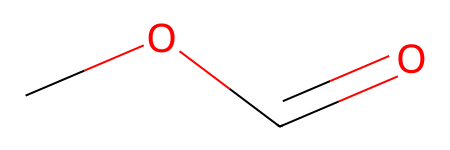

,molecule_smiles,group,atom_ids,substruct_smiles,masked_prediction,SME,non_masked_prediction,time_SME,HN_value,time_HN_value,Shapley_value,time_Shapley_value,ESOL
194,COC=O,fg,"[1, 0]",R-OMe,0.481491,0.178676,0.660167,0.763937,0.267950,0.072991,0.238472,0.047828,0.58
195,COC=O,fg,[3],R=O,0.299825,0.360342,0.660167,0.763937,0.449913,0.072991,0.420435,0.047828,0.58
196,COC=O,fg,[2],scaffold,0.655407,0.004760,0.660167,0.763937,-0.057697,0.072991,0.001261,0.047828,0.58


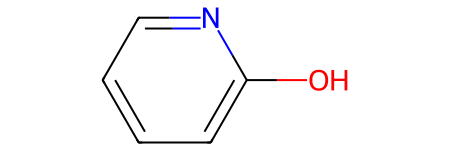

,molecule_smiles,group,atom_ids,substruct_smiles,masked_prediction,SME,non_masked_prediction,time_SME,HN_value,time_HN_value,Shapley_value,time_Shapley_value,ESOL
366,Oc1ccccn1,fg,[0],ROH,0.056108,0.651234,0.707342,0.483275,0.701436,0.04421,0.701436,0.031759,1.02
367,Oc1ccccn1,fg,"[1, 2, 3, 4, 5, 6]",scaffold,0.751637,-0.044295,0.707342,0.483275,0.005907,0.04421,0.005907,0.031759,1.02


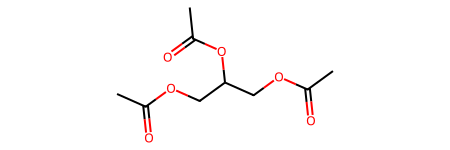

,molecule_smiles,group,atom_ids,substruct_smiles,masked_prediction,SME,non_masked_prediction,time_SME,HN_value,time_HN_value,Shapley_value,time_Shapley_value,ESOL
41,CC(=O)OCC(COC(C)=O)OC(C)=O,brics,"[0, 1, 2]",C(C)=O,-0.293844,0.103058,-0.190786,0.117,0.219402,0.459459,0.162734,0.439739,-0.6
42,CC(=O)OCC(COC(C)=O)OC(C)=O,brics,[3],O,-0.018207,-0.172579,-0.190786,0.117,-0.110359,0.459459,-0.116270,0.439739,-0.6
43,CC(=O)OCC(COC(C)=O)OC(C)=O,brics,"[4, 5, 6]",CCC,-0.130456,-0.060330,-0.190786,0.117,-0.297828,0.459459,-0.130441,0.439739,-0.6
44,CC(=O)OCC(COC(C)=O)OC(C)=O,brics,[7],O,-0.018207,-0.172579,-0.190786,0.117,-0.110359,0.459459,-0.116270,0.439739,-0.6
45,CC(=O)OCC(COC(C)=O)OC(C)=O,brics,"[8, 9, 10]",C(C)=O,-0.293844,0.103058,-0.190786,0.117,0.219402,0.459459,0.162734,0.439739,-0.6
46,CC(=O)OCC(COC(C)=O)OC(C)=O,brics,[11],O,0.139423,-0.330209,-0.190786,0.117,-0.329753,0.459459,-0.317010,0.439739,-0.6
47,CC(=O)OCC(COC(C)=O)OC(C)=O,brics,"[12, 13, 14]",C(C)=O,-0.294961,0.104175,-0.190786,0.117,0.218709,0.459459,0.163735,0.439739,-0.6


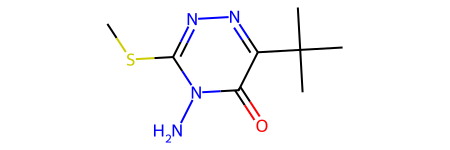

,molecule_smiles,group,atom_ids,substruct_smiles,masked_prediction,SME,non_masked_prediction,time_SME,HN_value,time_HN_value,Shapley_value,time_Shapley_value,ESOL
213,CSc1nnc(C(C)(C)C)c(=O)n1N,brics,"[0, 1]",SC,-2.244276,-0.102159,-2.346435,0.110435,-0.354310,0.522668,-0.354091,0.509342,-2.253
214,CSc1nnc(C(C)(C)C)c(=O)n1N,brics,"[2, 3, 4, 5, 10, 11, 12, 13]",c1nncn(N)c1=O,-2.559638,0.213202,-2.346435,0.110435,-0.882997,0.522668,-0.883435,0.509342,-2.253
215,CSc1nnc(C(C)(C)C)c(=O)n1N,brics,"[6, 7, 8, 9]",C(C)(C)C,-2.057377,-0.289058,-2.346435,0.110435,-1.109128,0.522668,-1.108909,0.509342,-2.253


In [21]:
for smiles in df.query("fidelity_type == 'negative' and fidelity >= -0.1 and absolute_error < 0.6").smiles.drop_duplicates().values:
    display(Chem.MolFromSmiles(smiles))
    display(attributions.query("molecule_smiles == @smiles"))
    print()

# Positive fidelity

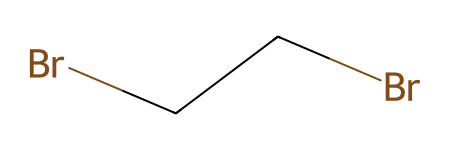

,molecule_smiles,group,atom_ids,substruct_smiles,masked_prediction,SME,non_masked_prediction,time_SME,HN_value,time_HN_value,Shapley_value,time_Shapley_value,ESOL
0,BrCCBr,fg,[0],RX,-1.365084,-0.294411,-1.659495,0.494529,-0.361364,0.042595,-0.355648,0.030232,-1.68
1,BrCCBr,fg,[3],RX,-1.365084,-0.294411,-1.659495,0.494529,-0.361364,0.042595,-0.355648,0.030232,-1.68
2,BrCCBr,fg,"[1, 2]",scaffold,-0.808419,-0.851076,-1.659495,0.494529,-0.936767,0.042595,-0.948198,0.030232,-1.68


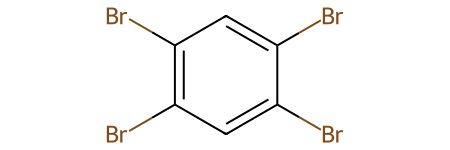

,molecule_smiles,group,atom_ids,substruct_smiles,masked_prediction,SME,non_masked_prediction,time_SME,HN_value,time_HN_value,Shapley_value,time_Shapley_value,ESOL
3,Brc1cc(Br)c(Br)cc1Br,fg,[0],RX,-6.303532,-0.206526,-6.510058,0.733389,-0.292167,0.052513,-0.303300,0.039076,-6.98
4,Brc1cc(Br)c(Br)cc1Br,fg,[4],RX,-6.303532,-0.206526,-6.510058,0.733389,-0.292167,0.052513,-0.303300,0.039076,-6.98
5,Brc1cc(Br)c(Br)cc1Br,fg,[6],RX,-6.303532,-0.206526,-6.510058,0.733389,-0.292167,0.052513,-0.303300,0.039076,-6.98
6,Brc1cc(Br)c(Br)cc1Br,fg,[9],RX,-6.303532,-0.206526,-6.510058,0.733389,-0.292167,0.052513,-0.303300,0.039076,-6.98
7,Brc1cc(Br)c(Br)cc1Br,fg,"[1, 2, 3, 5, 7, 8]",scaffold,-1.640161,-4.869898,-6.510058,0.733389,-5.341391,0.052513,-5.296857,0.039076,-6.98


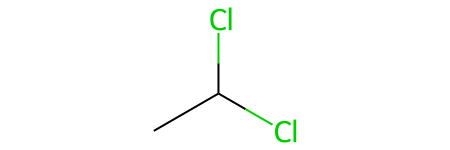

,molecule_smiles,group,atom_ids,substruct_smiles,masked_prediction,SME,non_masked_prediction,time_SME,HN_value,time_HN_value,Shapley_value,time_Shapley_value,ESOL
59,CC(Cl)Cl,fg,[2],RX,-0.954913,-0.184104,-1.139017,0.577634,-0.241409,0.07006,-0.235411,0.043303,-1.29
60,CC(Cl)Cl,fg,[3],RX,-0.954913,-0.184104,-1.139017,0.577634,-0.241409,0.07006,-0.235411,0.043303,-1.29
61,CC(Cl)Cl,fg,"[0, 1]",scaffold,-0.561515,-0.577502,-1.139017,0.577634,-0.656199,0.07006,-0.668196,0.043303,-1.29


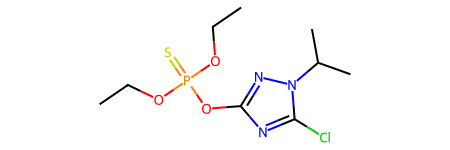

,molecule_smiles,group,atom_ids,substruct_smiles,masked_prediction,SME,non_masked_prediction,time_SME,HN_value,time_HN_value,Shapley_value,time_Shapley_value,ESOL
157,CCOP(=S)(OCC)Oc1nc(Cl)n(C(C)C)n1,brics,"[0, 1]",CC,-3.495834,-0.342010,-3.837844,0.119653,-0.276060,0.425892,-0.316023,0.411692,-3.658
158,CCOP(=S)(OCC)Oc1nc(Cl)n(C(C)C)n1,brics,"[2, 3, 4, 5, 8]",OP(=S)(O)O,-2.904436,-0.933408,-3.837844,0.119653,-1.304690,0.425892,-1.227212,0.411692,-3.658
159,CCOP(=S)(OCC)Oc1nc(Cl)n(C(C)C)n1,brics,"[6, 7]",CC,-3.495834,-0.342010,-3.837844,0.119653,-0.276060,0.425892,-0.316024,0.411692,-3.658
160,CCOP(=S)(OCC)Oc1nc(Cl)n(C(C)C)n1,brics,"[9, 10, 11, 12, 13, 17]",n1ncnc1Cl,-2.922996,-0.914849,-3.837844,0.119653,-1.187044,0.425892,-1.205186,0.411692,-3.658
161,CCOP(=S)(OCC)Oc1nc(Cl)n(C(C)C)n1,brics,"[14, 15, 16]",C(C)C,-3.124088,-0.713756,-3.837844,0.119653,-0.793990,0.425892,-0.773399,0.411692,-3.658


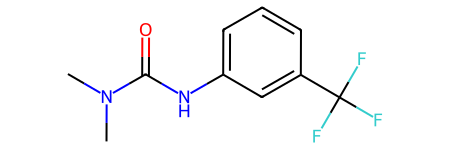

,molecule_smiles,group,atom_ids,substruct_smiles,masked_prediction,SME,non_masked_prediction,time_SME,HN_value,time_HN_value,Shapley_value,time_Shapley_value,ESOL
173,CN(C)C(=O)Nc1cccc(C(F)(F)F)c1,brics,"[0, 1, 2]",N(C)C,-3.689009,0.093296,-3.595713,0.129076,0.275877,0.533491,0.126315,0.518914,-3.43
174,CN(C)C(=O)Nc1cccc(C(F)(F)F)c1,brics,"[3, 4]",C=O,-3.527519,-0.068194,-3.595713,0.129076,0.131116,0.533491,0.168781,0.518914,-3.43
175,CN(C)C(=O)Nc1cccc(C(F)(F)F)c1,brics,[5],N,-3.338851,-0.256862,-3.595713,0.129076,-0.431531,0.533491,-0.189418,0.518914,-3.43
176,CN(C)C(=O)Nc1cccc(C(F)(F)F)c1,brics,"[6, 7, 8, 9, 10, 15]",c1ccccc1,-0.590967,-3.004746,-3.595713,0.129076,-2.691707,0.533491,-2.727463,0.518914,-3.43
177,CN(C)C(=O)Nc1cccc(C(F)(F)F)c1,brics,"[11, 12, 13, 14]",C(F)(F)F,-2.693269,-0.902444,-3.595713,0.129076,-0.879468,0.533491,-0.973928,0.518914,-3.43


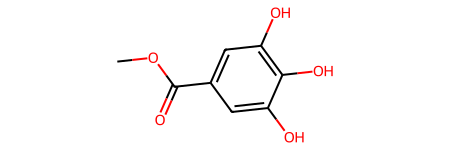

,molecule_smiles,group,atom_ids,substruct_smiles,masked_prediction,SME,non_masked_prediction,time_SME,HN_value,time_HN_value,Shapley_value,time_Shapley_value,ESOL
178,COC(=O)c1cc(O)c(O)c(O)c1,fg,"[2, 3, 1, 0]",R-C(=O)OCH3,-1.257744,-0.001424,-1.259169,0.503928,0.126958,0.036074,-0.040588,0.022786,-1.24
179,COC(=O)c1cc(O)c(O)c(O)c1,fg,[7],ROH,-1.733938,0.474769,-1.259169,0.503928,0.435742,0.036074,0.198454,0.022786,-1.24
180,COC(=O)c1cc(O)c(O)c(O)c1,fg,[9],ROH,-1.704221,0.445053,-1.259169,0.503928,0.407063,0.036074,0.159626,0.022786,-1.24
181,COC(=O)c1cc(O)c(O)c(O)c1,fg,[11],ROH,-1.733938,0.474769,-1.259169,0.503928,0.435742,0.036074,0.198454,0.022786,-1.24
182,COC(=O)c1cc(O)c(O)c(O)c1,fg,"[4, 5, 6, 8, 10, 12]",scaffold,-0.118709,-1.140459,-1.259169,0.503928,-2.664673,0.036074,-1.775115,0.022786,-1.24


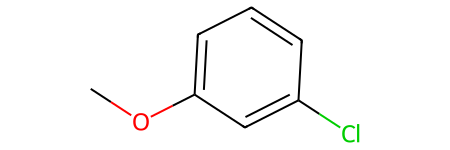

,molecule_smiles,group,atom_ids,substruct_smiles,masked_prediction,SME,non_masked_prediction,time_SME,HN_value,time_HN_value,Shapley_value,time_Shapley_value,ESOL
202,COc1cccc(Cl)c1,fg,"[1, 0]",R-OMe,-2.727367,0.061681,-2.665686,0.775472,0.141721,0.069489,0.150270,0.045318,-2.78
203,COc1cccc(Cl)c1,fg,[7],RX,-2.568375,-0.097311,-2.665686,0.775472,-0.109183,0.069489,-0.100635,0.045318,-2.78
204,COc1cccc(Cl)c1,fg,"[2, 3, 4, 5, 6, 8]",scaffold,0.148968,-2.814655,-2.665686,0.775472,-2.698224,0.069489,-2.715322,0.045318,-2.78


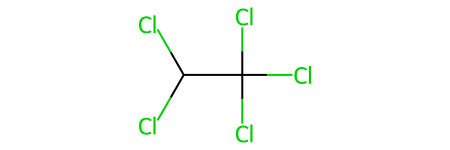

,molecule_smiles,group,atom_ids,substruct_smiles,masked_prediction,SME,non_masked_prediction,time_SME,HN_value,time_HN_value,Shapley_value,time_Shapley_value,ESOL
231,ClC(Cl)C(Cl)(Cl)Cl,fg,[0],RX,-2.694281,-0.320051,-3.014332,0.822468,-0.297448,0.065771,-0.297297,0.034261,-2.6
232,ClC(Cl)C(Cl)(Cl)Cl,fg,[2],RX,-2.694281,-0.320051,-3.014332,0.822468,-0.297448,0.065771,-0.297297,0.034261,-2.6
233,ClC(Cl)C(Cl)(Cl)Cl,fg,[4],RX,-2.491375,-0.522957,-3.014332,0.822468,-0.444707,0.065771,-0.456204,0.034261,-2.6
234,ClC(Cl)C(Cl)(Cl)Cl,fg,[5],RX,-2.491375,-0.522957,-3.014332,0.822468,-0.444707,0.065771,-0.456204,0.034261,-2.6
235,ClC(Cl)C(Cl)(Cl)Cl,fg,[6],RX,-2.491375,-0.522957,-3.014332,0.822468,-0.444707,0.065771,-0.456204,0.034261,-2.6
236,ClC(Cl)C(Cl)(Cl)Cl,fg,"[1, 3]",scaffold,-1.961544,-1.052788,-3.014332,0.822468,-1.085315,0.065771,-1.051125,0.034261,-2.6


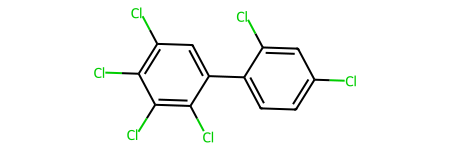

,molecule_smiles,group,atom_ids,substruct_smiles,masked_prediction,SME,non_masked_prediction,time_SME,HN_value,time_HN_value,Shapley_value,time_Shapley_value,ESOL
251,Clc1ccc(-c2cc(Cl)c(Cl)c(Cl)c2Cl)c(Cl)c1,fg,[0],RX,-7.797141,-0.061339,-7.85848,0.557052,-0.091685,0.107627,-0.085699,0.083469,-7.39
252,Clc1ccc(-c2cc(Cl)c(Cl)c(Cl)c2Cl)c(Cl)c1,fg,[8],RX,-7.798764,-0.059716,-7.85848,0.557052,-0.091921,0.107627,-0.085859,0.083469,-7.39
253,Clc1ccc(-c2cc(Cl)c(Cl)c(Cl)c2Cl)c(Cl)c1,fg,[10],RX,-7.804187,-0.054293,-7.85848,0.557052,-0.085989,0.107627,-0.079311,0.083469,-7.39
254,Clc1ccc(-c2cc(Cl)c(Cl)c(Cl)c2Cl)c(Cl)c1,fg,[12],RX,-7.804187,-0.054293,-7.85848,0.557052,-0.085989,0.107627,-0.079311,0.083469,-7.39
255,Clc1ccc(-c2cc(Cl)c(Cl)c(Cl)c2Cl)c(Cl)c1,fg,[14],RX,-7.804187,-0.054293,-7.85848,0.557052,-0.085989,0.107627,-0.079311,0.083469,-7.39
256,Clc1ccc(-c2cc(Cl)c(Cl)c(Cl)c2Cl)c(Cl)c1,fg,[16],RX,-7.798764,-0.059716,-7.85848,0.557052,-0.091921,0.107627,-0.085859,0.083469,-7.39
257,Clc1ccc(-c2cc(Cl)c(Cl)c(Cl)c2Cl)c(Cl)c1,fg,"[1, 2, 3, 4, 5, 6, 7, 9, 11, 13, 15, 17]",scaffold,-0.660021,-7.198459,-7.85848,0.557052,-7.324989,0.107627,-7.363131,0.083469,-7.39


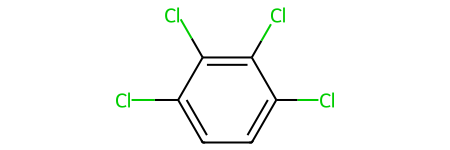

,molecule_smiles,group,atom_ids,substruct_smiles,masked_prediction,SME,non_masked_prediction,time_SME,HN_value,time_HN_value,Shapley_value,time_Shapley_value,ESOL
261,Clc1ccc(Cl)c(Cl)c1Cl,fg,[0],RX,-4.982623,-0.081333,-5.063956,0.69197,-0.105904,0.052505,-0.097965,0.028976,-4.57
262,Clc1ccc(Cl)c(Cl)c1Cl,fg,[5],RX,-4.982623,-0.081333,-5.063956,0.69197,-0.105904,0.052505,-0.097965,0.028976,-4.57
263,Clc1ccc(Cl)c(Cl)c1Cl,fg,[7],RX,-4.991912,-0.072044,-5.063956,0.69197,-0.097688,0.052505,-0.089521,0.028976,-4.57
264,Clc1ccc(Cl)c(Cl)c1Cl,fg,[9],RX,-4.991912,-0.072044,-5.063956,0.69197,-0.097688,0.052505,-0.089521,0.028976,-4.57
265,Clc1ccc(Cl)c(Cl)c1Cl,fg,"[1, 2, 3, 4, 6, 8]",scaffold,-0.416979,-4.646977,-5.063956,0.69197,-4.656771,0.052505,-4.688982,0.028976,-4.57


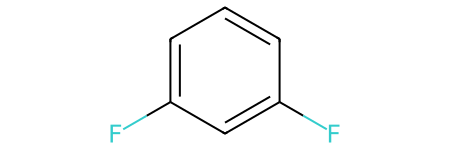

,molecule_smiles,group,atom_ids,substruct_smiles,masked_prediction,SME,non_masked_prediction,time_SME,HN_value,time_HN_value,Shapley_value,time_Shapley_value,ESOL
270,Fc1cccc(F)c1,fg,[0],RX,-1.989697,0.007271,-1.982425,0.531646,0.024420,0.031841,0.026377,0.018744,-2.0
271,Fc1cccc(F)c1,fg,[6],RX,-1.989697,0.007271,-1.982425,0.531646,0.024420,0.031841,0.026377,0.018744,-2.0
272,Fc1cccc(F)c1,fg,"[1, 2, 3, 4, 5, 7]",scaffold,0.088352,-2.070778,-1.982425,0.531646,-2.031266,0.031841,-2.035180,0.018744,-2.0


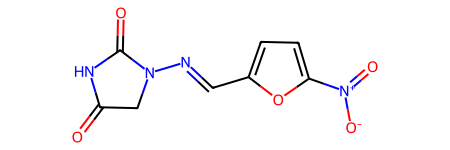

,molecule_smiles,group,atom_ids,substruct_smiles,masked_prediction,SME,non_masked_prediction,time_SME,HN_value,time_HN_value,Shapley_value,time_Shapley_value,ESOL
313,O=C1CN(N=Cc2ccc([N+](=O)[O-])o2)C(=O)N1,fg,"[10, 11, 12]",R-NO2,-3.006747,-0.208545,-3.215292,0.477148,-0.098046,0.033494,-0.095410,0.020877,-3.38
314,O=C1CN(N=Cc2ccc([N+](=O)[O-])o2)C(=O)N1,fg,[0],R=O,-3.231762,0.016470,-3.215292,0.477148,0.171389,0.033494,0.086943,0.020877,-3.38
315,O=C1CN(N=Cc2ccc([N+](=O)[O-])o2)C(=O)N1,fg,[15],R=O,-3.259170,0.043878,-3.215292,0.477148,0.137178,0.033494,0.059187,0.020877,-3.38
316,O=C1CN(N=Cc2ccc([N+](=O)[O-])o2)C(=O)N1,fg,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 13, 14, 16]",scaffold,0.190710,-3.406002,-3.215292,0.477148,-3.425813,0.033494,-3.266011,0.020877,-3.38


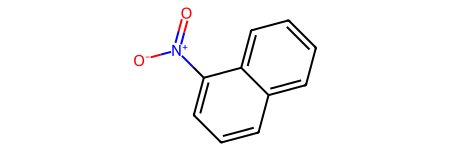

,molecule_smiles,group,atom_ids,substruct_smiles,masked_prediction,SME,non_masked_prediction,time_SME,HN_value,time_HN_value,Shapley_value,time_Shapley_value,ESOL
326,O=[N+]([O-])c1cccc2ccccc12,fg,"[1, 0, 2]",R-NO2,-3.581384,0.089342,-3.492043,0.712933,0.063096,0.101688,0.063096,0.072584,-3.54
327,O=[N+]([O-])c1cccc2ccccc12,fg,"[3, 4, 5, 6, 7, 8, 9, 10, 11, 12]",scaffold,0.036851,-3.528893,-3.492043,0.712933,-3.555139,0.101688,-3.555139,0.072584,-3.54


In [37]:
for smiles in df.query("fidelity_type == 'positive' and 0.1 >= fidelity >= 0 and absolute_error < 0.6").smiles.drop_duplicates().values:
    display(Chem.MolFromSmiles(smiles))
    display(attributions.query("molecule_smiles == @smiles"))
    print()

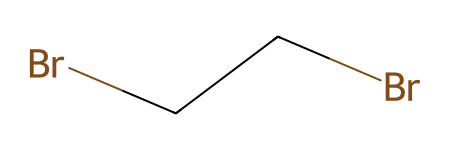

,molecule_smiles,group,atom_ids,substruct_smiles,masked_prediction,SME,non_masked_prediction,time_SME,HN_value,time_HN_value,Shapley_value,time_Shapley_value,ESOL
0,BrCCBr,fg,[0],RX,-1.365084,-0.294411,-1.659495,0.494529,-0.361364,0.042595,-0.355648,0.030232,-1.68
1,BrCCBr,fg,[3],RX,-1.365084,-0.294411,-1.659495,0.494529,-0.361364,0.042595,-0.355648,0.030232,-1.68
2,BrCCBr,fg,"[1, 2]",scaffold,-0.808419,-0.851076,-1.659495,0.494529,-0.936767,0.042595,-0.948198,0.030232,-1.68


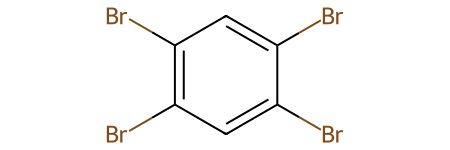

,molecule_smiles,group,atom_ids,substruct_smiles,masked_prediction,SME,non_masked_prediction,time_SME,HN_value,time_HN_value,Shapley_value,time_Shapley_value,ESOL
3,Brc1cc(Br)c(Br)cc1Br,fg,[0],RX,-6.303532,-0.206526,-6.510058,0.733389,-0.292167,0.052513,-0.303300,0.039076,-6.98
4,Brc1cc(Br)c(Br)cc1Br,fg,[4],RX,-6.303532,-0.206526,-6.510058,0.733389,-0.292167,0.052513,-0.303300,0.039076,-6.98
5,Brc1cc(Br)c(Br)cc1Br,fg,[6],RX,-6.303532,-0.206526,-6.510058,0.733389,-0.292167,0.052513,-0.303300,0.039076,-6.98
6,Brc1cc(Br)c(Br)cc1Br,fg,[9],RX,-6.303532,-0.206526,-6.510058,0.733389,-0.292167,0.052513,-0.303300,0.039076,-6.98
7,Brc1cc(Br)c(Br)cc1Br,fg,"[1, 2, 3, 5, 7, 8]",scaffold,-1.640161,-4.869898,-6.510058,0.733389,-5.341391,0.052513,-5.296857,0.039076,-6.98


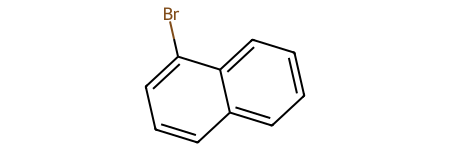

,molecule_smiles,group,atom_ids,substruct_smiles,masked_prediction,SME,non_masked_prediction,time_SME,HN_value,time_HN_value,Shapley_value,time_Shapley_value,ESOL
11,Brc1cccc2ccccc12,fg,[0],RX,-4.128155,-0.260593,-4.388748,0.858054,-0.320970,0.11626,-0.320970,0.078896,-4.35
12,Brc1cccc2ccccc12,fg,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]",scaffold,-0.381347,-4.007401,-4.388748,0.858054,-4.067778,0.11626,-4.067778,0.078896,-4.35


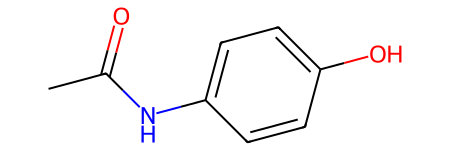

,molecule_smiles,group,atom_ids,substruct_smiles,masked_prediction,SME,non_masked_prediction,time_SME,HN_value,time_HN_value,Shapley_value,time_Shapley_value,ESOL
30,CC(=O)Nc1ccc(O)cc1,brics,"[0, 1, 2]",C(C)=O,-1.257712,-0.096935,-1.354646,0.115079,0.347105,0.457831,0.208104,0.44427,-1.03
31,CC(=O)Nc1ccc(O)cc1,brics,[3],N,-1.153062,-0.201584,-1.354646,0.115079,-0.407477,0.457831,-0.129477,0.44427,-1.03
32,CC(=O)Nc1ccc(O)cc1,brics,"[4, 5, 6, 7, 8, 9, 10]",c1ccc(O)cc1,0.427852,-1.782498,-1.354646,0.115079,-1.294273,0.457831,-1.433273,0.44427,-1.03


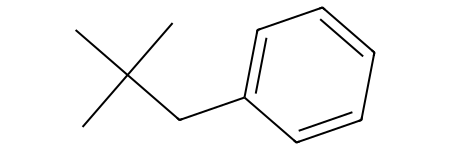

,molecule_smiles,group,atom_ids,substruct_smiles,masked_prediction,SME,non_masked_prediction,time_SME,HN_value,time_HN_value,Shapley_value,time_Shapley_value,ESOL
51,CC(C)(C)Cc1ccccc1,brics,"[0, 1, 2, 3, 4]",CC(C)(C)C,-1.935842,-2.301261,-4.237103,0.110923,-2.462433,0.469025,-2.462433,0.455911,-4.15
52,CC(C)(C)Cc1ccccc1,brics,"[5, 6, 7, 8, 9, 10]",c1ccccc1,-2.623605,-1.613497,-4.237103,0.110923,-1.774669,0.469025,-1.774669,0.455911,-4.15


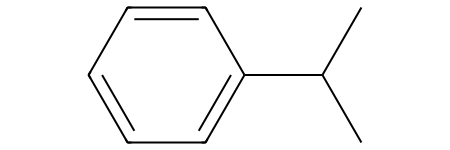

,molecule_smiles,group,atom_ids,substruct_smiles,masked_prediction,SME,non_masked_prediction,time_SME,HN_value,time_HN_value,Shapley_value,time_Shapley_value,ESOL
57,CC(C)c1ccccc1,brics,"[0, 1, 2]",C(C)C,-1.887295,-1.163441,-3.050735,0.100218,-1.246094,0.445947,-1.246094,0.432608,-3.27
58,CC(C)c1ccccc1,brics,"[3, 4, 5, 6, 7, 8]",c1ccccc1,-1.328748,-1.721988,-3.050735,0.100218,-1.804641,0.445947,-1.804641,0.432608,-3.27


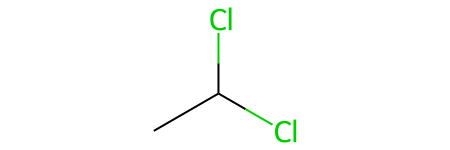

,molecule_smiles,group,atom_ids,substruct_smiles,masked_prediction,SME,non_masked_prediction,time_SME,HN_value,time_HN_value,Shapley_value,time_Shapley_value,ESOL
59,CC(Cl)Cl,fg,[2],RX,-0.954913,-0.184104,-1.139017,0.577634,-0.241409,0.07006,-0.235411,0.043303,-1.29
60,CC(Cl)Cl,fg,[3],RX,-0.954913,-0.184104,-1.139017,0.577634,-0.241409,0.07006,-0.235411,0.043303,-1.29
61,CC(Cl)Cl,fg,"[0, 1]",scaffold,-0.561515,-0.577502,-1.139017,0.577634,-0.656199,0.07006,-0.668196,0.043303,-1.29


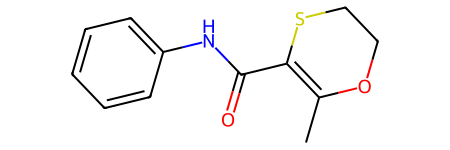

,molecule_smiles,group,atom_ids,substruct_smiles,masked_prediction,SME,non_masked_prediction,time_SME,HN_value,time_HN_value,Shapley_value,time_Shapley_value,ESOL
64,CC1=C(C(=O)Nc2ccccc2)SCCO1,brics,"[0, 1, 2, 3, 4, 12, 13, 14, 15]",C(=O)C1=C(C)OCCS1,-1.769728,-0.988444,-2.758173,0.086005,-0.739147,0.45052,-0.769734,0.437297,-3.14
65,CC1=C(C(=O)Nc2ccccc2)SCCO1,brics,[5],N,-2.434187,-0.323985,-2.758173,0.086005,-0.280812,0.45052,-0.219639,0.437297,-3.14
66,CC1=C(C(=O)Nc2ccccc2)SCCO1,brics,"[6, 7, 8, 9, 10, 11]",c1ccccc1,-0.946590,-1.811582,-2.758173,0.086005,-1.738213,0.45052,-1.768800,0.437297,-3.14


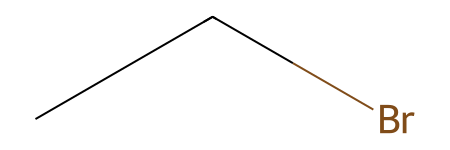

,molecule_smiles,group,atom_ids,substruct_smiles,masked_prediction,SME,non_masked_prediction,time_SME,HN_value,time_HN_value,Shapley_value,time_Shapley_value,ESOL
77,CCBr,fg,[2],RX,-0.908379,-0.360952,-1.269331,0.776024,-0.386082,0.067087,-0.386082,0.04522,-1.09
78,CCBr,fg,"[0, 1]",scaffold,-0.411212,-0.858119,-1.269331,0.776024,-0.883249,0.067087,-0.883249,0.04522,-1.09


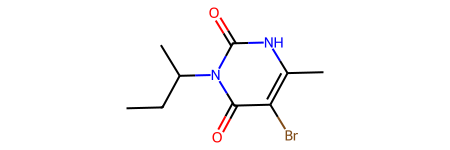

,molecule_smiles,group,atom_ids,substruct_smiles,masked_prediction,SME,non_masked_prediction,time_SME,HN_value,time_HN_value,Shapley_value,time_Shapley_value,ESOL
79,CCC(C)n1c(=O)[nH]c(C)c(Br)c1=O,brics,"[0, 1, 2, 3]",C(C)CC,-2.478227,-0.279911,-2.758138,0.087457,-1.141536,0.490842,-1.141536,0.477255,-2.523
80,CCC(C)n1c(=O)[nH]c(C)c(Br)c1=O,brics,"[4, 5, 6, 7, 8, 9, 10, 11, 12, 13]",n1c(=O)[nH]c(C)c(Br)c1=O,-2.003161,-0.754978,-2.758138,0.087457,-1.616602,0.490842,-1.616602,0.477255,-2.523


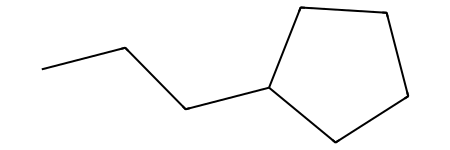

,molecule_smiles,group,atom_ids,substruct_smiles,masked_prediction,SME,non_masked_prediction,time_SME,HN_value,time_HN_value,Shapley_value,time_Shapley_value,ESOL
87,CCCC1CCCC1,brics,"[0, 1, 2]",CCC,-2.482981,-1.883417,-4.366397,0.086855,-1.804075,0.453232,-1.804075,0.440348,-4.74
88,CCCC1CCCC1,brics,"[3, 4, 5, 6, 7]",C1CCCC1,-1.724734,-2.641663,-4.366397,0.086855,-2.562322,0.453232,-2.562322,0.440348,-4.74


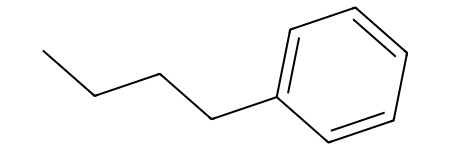

,molecule_smiles,group,atom_ids,substruct_smiles,masked_prediction,SME,non_masked_prediction,time_SME,HN_value,time_HN_value,Shapley_value,time_Shapley_value,ESOL
114,CCCCc1ccccc1,brics,"[0, 1, 2, 3]",CCCC,-1.910396,-2.032563,-3.942959,0.11052,-2.082616,0.458442,-2.082616,0.44506,-4.06
115,CCCCc1ccccc1,brics,"[4, 5, 6, 7, 8, 9]",c1ccccc1,-2.132669,-1.810290,-3.942959,0.11052,-1.860343,0.458442,-1.860343,0.44506,-4.06


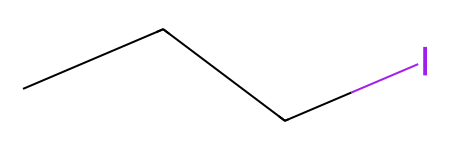

,molecule_smiles,group,atom_ids,substruct_smiles,masked_prediction,SME,non_masked_prediction,time_SME,HN_value,time_HN_value,Shapley_value,time_Shapley_value,ESOL
116,CCCI,fg,[3],RX,-1.646896,-0.460185,-2.107081,0.464489,-0.505377,0.05466,-0.505377,0.017576,-2.29
117,CCCI,fg,"[0, 1, 2]",scaffold,-0.550569,-1.556512,-2.107081,0.464489,-1.601703,0.05466,-1.601703,0.017576,-2.29


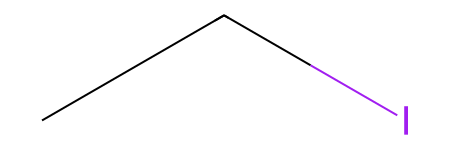

,molecule_smiles,group,atom_ids,substruct_smiles,masked_prediction,SME,non_masked_prediction,time_SME,HN_value,time_HN_value,Shapley_value,time_Shapley_value,ESOL
127,CCI,fg,[2],RX,-1.027726,-0.507905,-1.535632,0.890114,-0.526196,0.088109,-0.526196,0.111652,-1.6
128,CCI,fg,"[0, 1]",scaffold,-0.544487,-0.991144,-1.535632,0.890114,-1.009436,0.088109,-1.009436,0.111652,-1.6


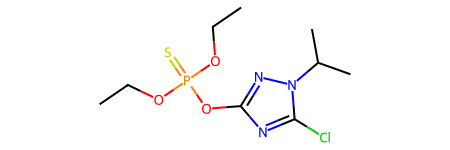

,molecule_smiles,group,atom_ids,substruct_smiles,masked_prediction,SME,non_masked_prediction,time_SME,HN_value,time_HN_value,Shapley_value,time_Shapley_value,ESOL
157,CCOP(=S)(OCC)Oc1nc(Cl)n(C(C)C)n1,brics,"[0, 1]",CC,-3.495834,-0.342010,-3.837844,0.119653,-0.276060,0.425892,-0.316023,0.411692,-3.658
158,CCOP(=S)(OCC)Oc1nc(Cl)n(C(C)C)n1,brics,"[2, 3, 4, 5, 8]",OP(=S)(O)O,-2.904436,-0.933408,-3.837844,0.119653,-1.304690,0.425892,-1.227212,0.411692,-3.658
159,CCOP(=S)(OCC)Oc1nc(Cl)n(C(C)C)n1,brics,"[6, 7]",CC,-3.495834,-0.342010,-3.837844,0.119653,-0.276060,0.425892,-0.316024,0.411692,-3.658
160,CCOP(=S)(OCC)Oc1nc(Cl)n(C(C)C)n1,brics,"[9, 10, 11, 12, 13, 17]",n1ncnc1Cl,-2.922996,-0.914849,-3.837844,0.119653,-1.187044,0.425892,-1.205186,0.411692,-3.658
161,CCOP(=S)(OCC)Oc1nc(Cl)n(C(C)C)n1,brics,"[14, 15, 16]",C(C)C,-3.124088,-0.713756,-3.837844,0.119653,-0.793990,0.425892,-0.773399,0.411692,-3.658


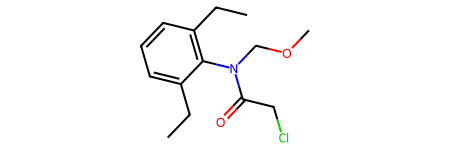

,molecule_smiles,group,atom_ids,substruct_smiles,masked_prediction,SME,non_masked_prediction,time_SME,HN_value,time_HN_value,Shapley_value,time_Shapley_value,ESOL
166,CCc1cccc(CC)c1N(COC)C(=O)CCl,brics,"[0, 1]",CC,-3.199154,-0.288719,-3.487873,0.159901,-0.521141,0.442942,-0.432206,0.428336,-3.26
167,CCc1cccc(CC)c1N(COC)C(=O)CCl,brics,"[2, 3, 4, 5, 6, 9]",c1ccccc1,-0.772254,-2.715619,-3.487873,0.159901,-2.352114,0.442942,-2.629886,0.428336,-3.26
168,CCc1cccc(CC)c1N(COC)C(=O)CCl,brics,"[7, 8]",CC,-3.199154,-0.288719,-3.487873,0.159901,-0.521141,0.442942,-0.432206,0.428336,-3.26
169,CCc1cccc(CC)c1N(COC)C(=O)CCl,brics,"[10, 11, 12, 13]",NCOC,-3.332458,-0.155415,-3.487873,0.159901,0.156395,0.442942,0.127399,0.428336,-3.26
170,CCc1cccc(CC)c1N(COC)C(=O)CCl,brics,"[14, 15, 16, 17]",C(=O)CCl,-3.278198,-0.209675,-3.487873,0.159901,-0.249872,0.442942,-0.120974,0.428336,-3.26


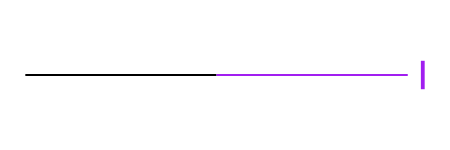

,molecule_smiles,group,atom_ids,substruct_smiles,masked_prediction,SME,non_masked_prediction,time_SME,HN_value,time_HN_value,Shapley_value,time_Shapley_value,ESOL
171,CI,fg,[1],RX,-0.580035,-0.479909,-1.059944,0.531574,-0.467866,0.036052,-0.467866,0.021618,-1.0
172,CI,fg,[0],scaffold,-0.455823,-0.604122,-1.059944,0.531574,-0.592078,0.036052,-0.592078,0.021618,-1.0


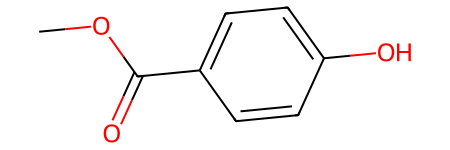

,molecule_smiles,group,atom_ids,substruct_smiles,masked_prediction,SME,non_masked_prediction,time_SME,HN_value,time_HN_value,Shapley_value,time_Shapley_value,ESOL
183,COC(=O)c1ccc(O)cc1,brics,"[0, 1]",OC,-1.358231,-0.001357,-1.359588,0.121069,0.083009,0.448822,0.046417,0.435351,-1.827
184,COC(=O)c1ccc(O)cc1,brics,"[2, 3]",C=O,-1.204412,-0.155176,-1.359588,0.121069,-0.021310,0.448822,0.051874,0.435351,-1.827
185,COC(=O)c1ccc(O)cc1,brics,"[4, 5, 6, 7, 8, 9, 10]",c1ccc(O)cc1,0.389614,-1.749202,-1.359588,0.121069,-1.421287,0.448822,-1.457879,0.435351,-1.827


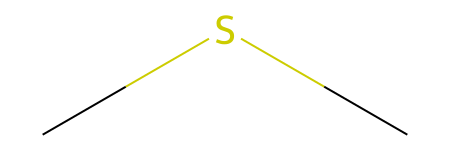

,molecule_smiles,group,atom_ids,substruct_smiles,masked_prediction,SME,non_masked_prediction,time_SME,HN_value,time_HN_value,Shapley_value,time_Shapley_value,ESOL
211,CSC,fg,"[1, 2]",R-SCH3,-0.309297,-0.520381,-0.829677,0.601612,-0.515437,0.044046,-0.515437,0.031634,-0.45
212,CSC,fg,[0],scaffold,-0.510493,-0.319185,-0.829677,0.601612,-0.314241,0.044046,-0.314241,0.031634,-0.45


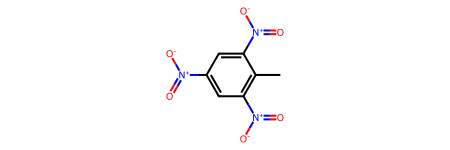

,molecule_smiles,group,atom_ids,substruct_smiles,masked_prediction,SME,non_masked_prediction,time_SME,HN_value,time_HN_value,Shapley_value,time_Shapley_value,ESOL
216,Cc1c([N+](=O)[O-])cc([N+](=O)[O-])cc1[N+](=O)[O-],fg,"[3, 4, 5]",R-NO2,-3.574608,-0.183154,-3.757762,0.627051,-0.037640,0.055474,-0.052473,0.029697,-3.22
217,Cc1c([N+](=O)[O-])cc([N+](=O)[O-])cc1[N+](=O)[O-],fg,"[8, 9, 10]",R-NO2,-3.574864,-0.182899,-3.757762,0.627051,-0.037090,0.055474,-0.051931,0.029697,-3.22
218,Cc1c([N+](=O)[O-])cc([N+](=O)[O-])cc1[N+](=O)[O-],fg,"[13, 14, 15]",R-NO2,-3.574608,-0.183154,-3.757762,0.627051,-0.037640,0.055474,-0.052473,0.029697,-3.22
219,Cc1c([N+](=O)[O-])cc([N+](=O)[O-])cc1[N+](=O)[O-],fg,"[0, 1, 2, 6, 7, 11, 12]",scaffold,0.074175,-3.831937,-3.757762,0.627051,-3.645392,0.055474,-3.600886,0.029697,-3.22


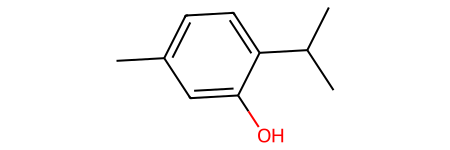

,molecule_smiles,group,atom_ids,substruct_smiles,masked_prediction,SME,non_masked_prediction,time_SME,HN_value,time_HN_value,Shapley_value,time_Shapley_value,ESOL
221,Cc1ccc(C(C)C)c(O)c1,brics,"[0, 1, 2, 3, 4, 8, 9, 10]",c1ccc(C)cc1O,-1.298817,-1.227104,-2.525921,0.093736,-1.302848,0.454574,-1.302848,0.441048,-2.22
222,Cc1ccc(C(C)C)c(O)c1,brics,"[5, 6, 7]",C(C)C,-1.378591,-1.147330,-2.525921,0.093736,-1.223073,0.454574,-1.223073,0.441048,-2.22


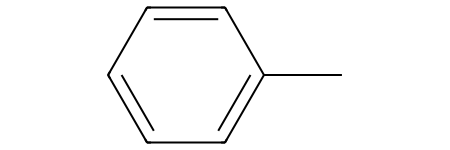

,molecule_smiles,group,atom_ids,substruct_smiles,masked_prediction,SME,non_masked_prediction,time_SME,HN_value,time_HN_value,Shapley_value,time_Shapley_value,ESOL


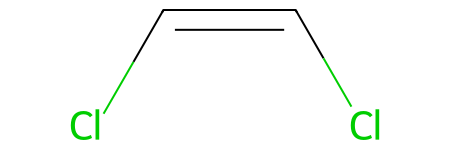

,molecule_smiles,group,atom_ids,substruct_smiles,masked_prediction,SME,non_masked_prediction,time_SME,HN_value,time_HN_value,Shapley_value,time_Shapley_value,ESOL
228,Cl/C=C\Cl,fg,[0],RX,-1.220547,-0.246547,-1.467094,0.48573,-0.253424,0.044269,-0.251035,0.031655,-1.3
229,Cl/C=C\Cl,fg,[3],RX,-1.220547,-0.246547,-1.467094,0.48573,-0.253423,0.044269,-0.251035,0.031655,-1.3
230,Cl/C=C\Cl,fg,"[1, 2]",scaffold,-0.525230,-0.941864,-1.467094,0.48573,-0.960247,0.044269,-0.965024,0.031655,-1.3


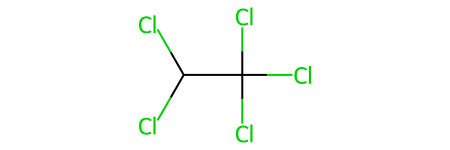

,molecule_smiles,group,atom_ids,substruct_smiles,masked_prediction,SME,non_masked_prediction,time_SME,HN_value,time_HN_value,Shapley_value,time_Shapley_value,ESOL
231,ClC(Cl)C(Cl)(Cl)Cl,fg,[0],RX,-2.694281,-0.320051,-3.014332,0.822468,-0.297448,0.065771,-0.297297,0.034261,-2.6
232,ClC(Cl)C(Cl)(Cl)Cl,fg,[2],RX,-2.694281,-0.320051,-3.014332,0.822468,-0.297448,0.065771,-0.297297,0.034261,-2.6
233,ClC(Cl)C(Cl)(Cl)Cl,fg,[4],RX,-2.491375,-0.522957,-3.014332,0.822468,-0.444707,0.065771,-0.456204,0.034261,-2.6
234,ClC(Cl)C(Cl)(Cl)Cl,fg,[5],RX,-2.491375,-0.522957,-3.014332,0.822468,-0.444707,0.065771,-0.456204,0.034261,-2.6
235,ClC(Cl)C(Cl)(Cl)Cl,fg,[6],RX,-2.491375,-0.522957,-3.014332,0.822468,-0.444707,0.065771,-0.456204,0.034261,-2.6
236,ClC(Cl)C(Cl)(Cl)Cl,fg,"[1, 3]",scaffold,-1.961544,-1.052788,-3.014332,0.822468,-1.085315,0.065771,-1.051125,0.034261,-2.6


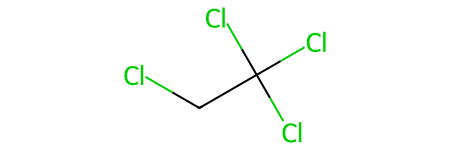

,molecule_smiles,group,atom_ids,substruct_smiles,masked_prediction,SME,non_masked_prediction,time_SME,HN_value,time_HN_value,Shapley_value,time_Shapley_value,ESOL
237,ClCC(Cl)(Cl)Cl,fg,[0],RX,-2.339346,-0.153688,-2.493034,0.616046,-0.204824,0.04693,-0.190766,0.032582,-2.18
238,ClCC(Cl)(Cl)Cl,fg,[3],RX,-2.041044,-0.451990,-2.493034,0.616046,-0.428003,0.04693,-0.436167,0.032582,-2.18
239,ClCC(Cl)(Cl)Cl,fg,[4],RX,-2.041044,-0.451990,-2.493034,0.616046,-0.428003,0.04693,-0.436167,0.032582,-2.18
240,ClCC(Cl)(Cl)Cl,fg,[5],RX,-2.041044,-0.451990,-2.493034,0.616046,-0.428003,0.04693,-0.436167,0.032582,-2.18
241,ClCC(Cl)(Cl)Cl,fg,"[1, 2]",scaffold,-1.494198,-0.998837,-2.493034,0.616046,-1.004202,0.04693,-0.993767,0.032582,-2.18


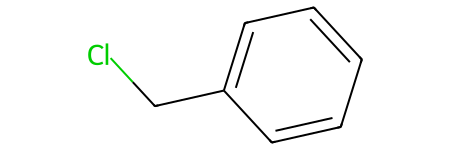

,molecule_smiles,group,atom_ids,substruct_smiles,masked_prediction,SME,non_masked_prediction,time_SME,HN_value,time_HN_value,Shapley_value,time_Shapley_value,ESOL
242,ClCc1ccccc1,brics,"[0, 1]",CCl,-1.923284,-0.368630,-2.291914,0.100057,-0.411204,0.52266,-0.411204,0.508902,-2.39
243,ClCc1ccccc1,brics,"[2, 3, 4, 5, 6, 7]",c1ccccc1,-0.453778,-1.838135,-2.291914,0.100057,-1.880710,0.52266,-1.880710,0.508902,-2.39


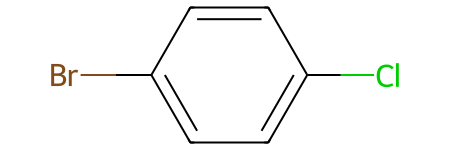

,molecule_smiles,group,atom_ids,substruct_smiles,masked_prediction,SME,non_masked_prediction,time_SME,HN_value,time_HN_value,Shapley_value,time_Shapley_value,ESOL
258,Clc1ccc(Br)cc1,fg,[0],RX,-3.656333,-0.107635,-3.763968,0.801255,-0.120720,0.058951,-0.118221,0.031546,-3.63
259,Clc1ccc(Br)cc1,fg,[5],RX,-3.254001,-0.509967,-3.763968,0.801255,-0.473255,0.058951,-0.470756,0.031546,-3.63
260,Clc1ccc(Br)cc1,fg,"[1, 2, 3, 4, 6, 7]",scaffold,-0.545637,-3.218331,-3.763968,0.801255,-3.169993,0.058951,-3.174990,0.031546,-3.63


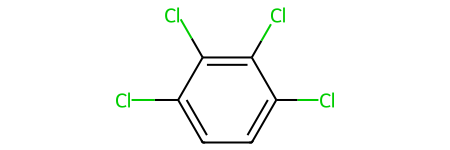

,molecule_smiles,group,atom_ids,substruct_smiles,masked_prediction,SME,non_masked_prediction,time_SME,HN_value,time_HN_value,Shapley_value,time_Shapley_value,ESOL
261,Clc1ccc(Cl)c(Cl)c1Cl,fg,[0],RX,-4.982623,-0.081333,-5.063956,0.69197,-0.105904,0.052505,-0.097965,0.028976,-4.57
262,Clc1ccc(Cl)c(Cl)c1Cl,fg,[5],RX,-4.982623,-0.081333,-5.063956,0.69197,-0.105904,0.052505,-0.097965,0.028976,-4.57
263,Clc1ccc(Cl)c(Cl)c1Cl,fg,[7],RX,-4.991912,-0.072044,-5.063956,0.69197,-0.097688,0.052505,-0.089521,0.028976,-4.57
264,Clc1ccc(Cl)c(Cl)c1Cl,fg,[9],RX,-4.991912,-0.072044,-5.063956,0.69197,-0.097688,0.052505,-0.089521,0.028976,-4.57
265,Clc1ccc(Cl)c(Cl)c1Cl,fg,"[1, 2, 3, 4, 6, 8]",scaffold,-0.416979,-4.646977,-5.063956,0.69197,-4.656771,0.052505,-4.688982,0.028976,-4.57


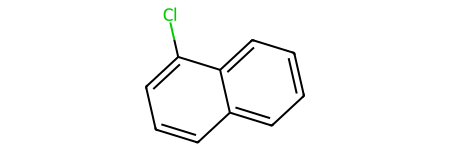

,molecule_smiles,group,atom_ids,substruct_smiles,masked_prediction,SME,non_masked_prediction,time_SME,HN_value,time_HN_value,Shapley_value,time_Shapley_value,ESOL
266,Clc1cccc2ccccc12,fg,[0],RX,-3.925621,-0.114810,-4.040431,0.804553,-0.120458,0.052474,-0.120458,0.025728,-3.93
267,Clc1cccc2ccccc12,fg,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]",scaffold,-0.126108,-3.914323,-4.040431,0.804553,-3.919971,0.052474,-3.919971,0.025728,-3.93


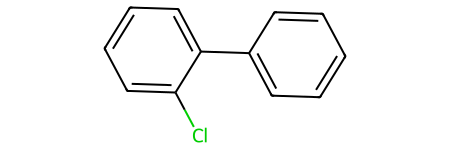

,molecule_smiles,group,atom_ids,substruct_smiles,masked_prediction,SME,non_masked_prediction,time_SME,HN_value,time_HN_value,Shapley_value,time_Shapley_value,ESOL
268,Clc1ccccc1-c1ccccc1,brics,"[0, 1, 2, 3, 4, 5, 6]",c1ccccc1Cl,-1.911534,-2.794565,-4.706099,0.0847,-2.711265,0.502126,-2.711265,0.488182,-4.54
269,Clc1ccccc1-c1ccccc1,brics,"[7, 8, 9, 10, 11, 12]",c1ccccc1,-2.627966,-2.078133,-4.706099,0.0847,-1.994834,0.502126,-1.994834,0.488182,-4.54


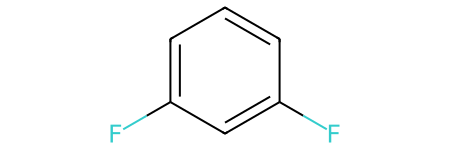

,molecule_smiles,group,atom_ids,substruct_smiles,masked_prediction,SME,non_masked_prediction,time_SME,HN_value,time_HN_value,Shapley_value,time_Shapley_value,ESOL
270,Fc1cccc(F)c1,fg,[0],RX,-1.989697,0.007271,-1.982425,0.531646,0.024420,0.031841,0.026377,0.018744,-2.0
271,Fc1cccc(F)c1,fg,[6],RX,-1.989697,0.007271,-1.982425,0.531646,0.024420,0.031841,0.026377,0.018744,-2.0
272,Fc1cccc(F)c1,fg,"[1, 2, 3, 4, 5, 7]",scaffold,0.088352,-2.070778,-1.982425,0.531646,-2.031266,0.031841,-2.035180,0.018744,-2.0


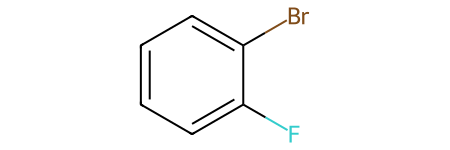

,molecule_smiles,group,atom_ids,substruct_smiles,masked_prediction,SME,non_masked_prediction,time_SME,HN_value,time_HN_value,Shapley_value,time_Shapley_value,ESOL
273,Fc1ccccc1Br,fg,[0],RX,-2.954993,-0.070441,-3.025434,1.002632,-0.041643,0.078982,-0.047132,0.065133,-2.7
274,Fc1ccccc1Br,fg,[7],RX,-2.668285,-0.357150,-3.025434,1.002632,-0.364552,0.078982,-0.370041,0.065133,-2.7
275,Fc1ccccc1Br,fg,"[1, 2, 3, 4, 5, 6]",scaffold,-0.427126,-2.598308,-3.025434,1.002632,-2.619240,0.078982,-2.608261,0.065133,-2.7


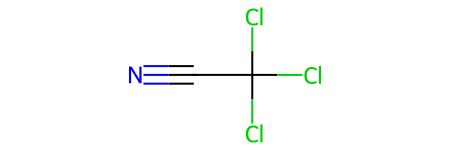

,molecule_smiles,group,atom_ids,substruct_smiles,masked_prediction,SME,non_masked_prediction,time_SME,HN_value,time_HN_value,Shapley_value,time_Shapley_value,ESOL
279,N#CC(Cl)(Cl)Cl,fg,"[1, 0]",R-CN,-1.937957,-0.061274,-1.999231,0.659865,0.192326,0.056571,0.116949,0.02381,-2.168
280,N#CC(Cl)(Cl)Cl,fg,[3],RX,-1.412871,-0.586360,-1.999231,0.659865,-0.478052,0.056571,-0.516305,0.02381,-2.168
281,N#CC(Cl)(Cl)Cl,fg,[4],RX,-1.412871,-0.586360,-1.999231,0.659865,-0.478052,0.056571,-0.516305,0.02381,-2.168
282,N#CC(Cl)(Cl)Cl,fg,[5],RX,-1.412871,-0.586360,-1.999231,0.659865,-0.478052,0.056571,-0.516305,0.02381,-2.168
283,N#CC(Cl)(Cl)Cl,fg,[2],scaffold,-1.387561,-0.611670,-1.999231,0.659865,-0.757401,0.056571,-0.567263,0.02381,-2.168


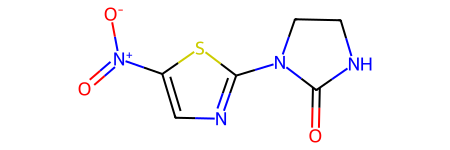

,molecule_smiles,group,atom_ids,substruct_smiles,masked_prediction,SME,non_masked_prediction,time_SME,HN_value,time_HN_value,Shapley_value,time_Shapley_value,ESOL
317,O=C1NCCN1c1ncc([N+](=O)[O-])s1,fg,"[10, 11, 12]",R-NO2,-2.442159,-0.278046,-2.720205,0.789017,-0.110885,0.067533,-0.109614,0.035026,-3.22
318,O=C1NCCN1c1ncc([N+](=O)[O-])s1,fg,[0],R=O,-2.506733,-0.213472,-2.720205,0.789017,0.084621,0.067533,0.085892,0.035026,-3.22
319,O=C1NCCN1c1ncc([N+](=O)[O-])s1,fg,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 13]",scaffold,0.427662,-3.147867,-2.720205,0.789017,-2.693941,0.067533,-2.696483,0.035026,-3.22


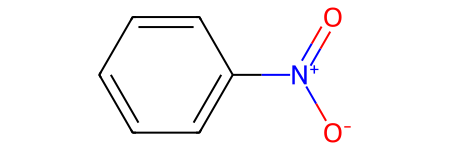

,molecule_smiles,group,atom_ids,substruct_smiles,masked_prediction,SME,non_masked_prediction,time_SME,HN_value,time_HN_value,Shapley_value,time_Shapley_value,ESOL
328,O=[N+]([O-])c1ccccc1,fg,"[1, 0, 2]",R-NO2,-1.968932,-0.060152,-2.029084,0.705483,-0.011238,0.071801,-0.011238,0.05901,-1.8
329,O=[N+]([O-])c1ccccc1,fg,"[3, 4, 5, 6, 7, 8]",scaffold,0.037675,-2.066759,-2.029084,0.705483,-2.017846,0.071801,-2.017846,0.05901,-1.8


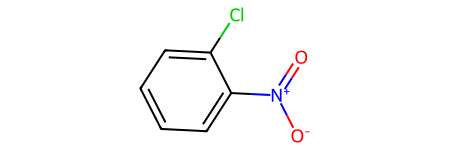

,molecule_smiles,group,atom_ids,substruct_smiles,masked_prediction,SME,non_masked_prediction,time_SME,HN_value,time_HN_value,Shapley_value,time_Shapley_value,ESOL
330,O=[N+]([O-])c1ccccc1Cl,fg,"[1, 0, 2]",R-NO2,-2.584193,-0.110647,-2.694839,0.757467,-0.047612,0.041543,-0.035661,0.029024,-2.55
331,O=[N+]([O-])c1ccccc1Cl,fg,[9],RX,-2.643698,-0.051141,-2.694839,0.757467,-0.099339,0.041543,-0.087387,0.029024,-2.55
332,O=[N+]([O-])c1ccccc1Cl,fg,"[3, 4, 5, 6, 7, 8]",scaffold,-0.038978,-2.655861,-2.694839,0.757467,-2.547888,0.041543,-2.571791,0.029024,-2.55


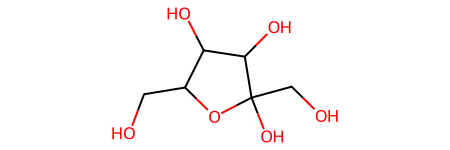

,molecule_smiles,group,atom_ids,substruct_smiles,masked_prediction,SME,non_masked_prediction,time_SME,HN_value,time_HN_value,Shapley_value,time_Shapley_value,ESOL
335,OCC1OC(O)(CO)C(O)C1O,fg,[0],ROH,0.573833,-0.171755,0.402078,0.622133,0.455379,0.063871,0.147020,0.048481,0.64
336,OCC1OC(O)(CO)C(O)C1O,fg,[5],ROH,0.690058,-0.287981,0.402078,0.622133,0.316027,0.063871,0.024584,0.048481,0.64
337,OCC1OC(O)(CO)C(O)C1O,fg,[7],ROH,0.588935,-0.186857,0.402078,0.622133,0.438944,0.063871,0.130197,0.048481,0.64
338,OCC1OC(O)(CO)C(O)C1O,fg,[9],ROH,0.462422,-0.060344,0.402078,0.622133,0.154234,0.063871,0.036018,0.048481,0.64
339,OCC1OC(O)(CO)C(O)C1O,fg,[11],ROH,0.442869,-0.040792,0.402078,0.622133,0.120214,0.063871,0.028211,0.048481,0.64
340,OCC1OC(O)(CO)C(O)C1O,fg,"[1, 2, 3, 4, 6, 8, 10]",scaffold,0.528110,-0.126032,0.402078,0.622133,-1.082721,0.063871,0.036048,0.048481,0.64


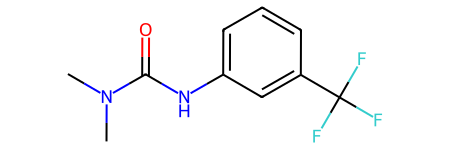

,molecule_smiles,group,atom_ids,substruct_smiles,masked_prediction,SME,non_masked_prediction,time_SME,HN_value,time_HN_value,Shapley_value,time_Shapley_value,ESOL
173,CN(C)C(=O)Nc1cccc(C(F)(F)F)c1,brics,"[0, 1, 2]",N(C)C,-3.689009,0.093296,-3.595713,0.129076,0.275877,0.533491,0.126315,0.518914,-3.43
174,CN(C)C(=O)Nc1cccc(C(F)(F)F)c1,brics,"[3, 4]",C=O,-3.527519,-0.068194,-3.595713,0.129076,0.131116,0.533491,0.168781,0.518914,-3.43
175,CN(C)C(=O)Nc1cccc(C(F)(F)F)c1,brics,[5],N,-3.338851,-0.256862,-3.595713,0.129076,-0.431531,0.533491,-0.189418,0.518914,-3.43
176,CN(C)C(=O)Nc1cccc(C(F)(F)F)c1,brics,"[6, 7, 8, 9, 10, 15]",c1ccccc1,-0.590967,-3.004746,-3.595713,0.129076,-2.691707,0.533491,-2.727463,0.518914,-3.43
177,CN(C)C(=O)Nc1cccc(C(F)(F)F)c1,brics,"[11, 12, 13, 14]",C(F)(F)F,-2.693269,-0.902444,-3.595713,0.129076,-0.879468,0.533491,-0.973928,0.518914,-3.43


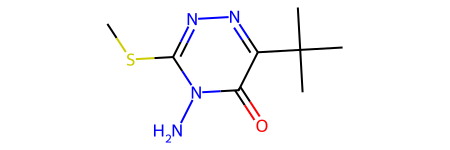

,molecule_smiles,group,atom_ids,substruct_smiles,masked_prediction,SME,non_masked_prediction,time_SME,HN_value,time_HN_value,Shapley_value,time_Shapley_value,ESOL
213,CSc1nnc(C(C)(C)C)c(=O)n1N,brics,"[0, 1]",SC,-2.244276,-0.102159,-2.346435,0.110435,-0.354310,0.522668,-0.354091,0.509342,-2.253
214,CSc1nnc(C(C)(C)C)c(=O)n1N,brics,"[2, 3, 4, 5, 10, 11, 12, 13]",c1nncn(N)c1=O,-2.559638,0.213202,-2.346435,0.110435,-0.882997,0.522668,-0.883435,0.509342,-2.253
215,CSc1nnc(C(C)(C)C)c(=O)n1N,brics,"[6, 7, 8, 9]",C(C)(C)C,-2.057377,-0.289058,-2.346435,0.110435,-1.109128,0.522668,-1.108909,0.509342,-2.253


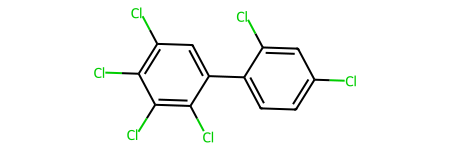

,molecule_smiles,group,atom_ids,substruct_smiles,masked_prediction,SME,non_masked_prediction,time_SME,HN_value,time_HN_value,Shapley_value,time_Shapley_value,ESOL
251,Clc1ccc(-c2cc(Cl)c(Cl)c(Cl)c2Cl)c(Cl)c1,fg,[0],RX,-7.797141,-0.061339,-7.85848,0.557052,-0.091685,0.107627,-0.085699,0.083469,-7.39
252,Clc1ccc(-c2cc(Cl)c(Cl)c(Cl)c2Cl)c(Cl)c1,fg,[8],RX,-7.798764,-0.059716,-7.85848,0.557052,-0.091921,0.107627,-0.085859,0.083469,-7.39
253,Clc1ccc(-c2cc(Cl)c(Cl)c(Cl)c2Cl)c(Cl)c1,fg,[10],RX,-7.804187,-0.054293,-7.85848,0.557052,-0.085989,0.107627,-0.079311,0.083469,-7.39
254,Clc1ccc(-c2cc(Cl)c(Cl)c(Cl)c2Cl)c(Cl)c1,fg,[12],RX,-7.804187,-0.054293,-7.85848,0.557052,-0.085989,0.107627,-0.079311,0.083469,-7.39
255,Clc1ccc(-c2cc(Cl)c(Cl)c(Cl)c2Cl)c(Cl)c1,fg,[14],RX,-7.804187,-0.054293,-7.85848,0.557052,-0.085989,0.107627,-0.079311,0.083469,-7.39
256,Clc1ccc(-c2cc(Cl)c(Cl)c(Cl)c2Cl)c(Cl)c1,fg,[16],RX,-7.798764,-0.059716,-7.85848,0.557052,-0.091921,0.107627,-0.085859,0.083469,-7.39
257,Clc1ccc(-c2cc(Cl)c(Cl)c(Cl)c2Cl)c(Cl)c1,fg,"[1, 2, 3, 4, 5, 6, 7, 9, 11, 13, 15, 17]",scaffold,-0.660021,-7.198459,-7.85848,0.557052,-7.324989,0.107627,-7.363131,0.083469,-7.39


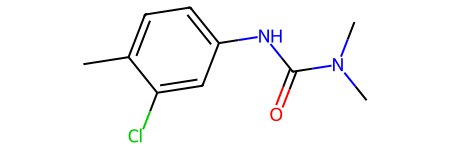

,molecule_smiles,group,atom_ids,substruct_smiles,masked_prediction,SME,non_masked_prediction,time_SME,HN_value,time_HN_value,Shapley_value,time_Shapley_value,ESOL
223,Cc1ccc(NC(=O)N(C)C)cc1Cl,brics,"[0, 1, 2, 3, 4, 11, 12, 13]",c1ccc(C)c(Cl)c1,0.598810,-3.800678,-3.201868,0.116689,-3.410404,0.451655,-3.547384,0.438318,-3.483
224,Cc1ccc(NC(=O)N(C)C)cc1Cl,brics,[5],N,-3.041952,-0.159916,-3.201868,0.116689,-0.249014,0.451655,-0.105671,0.438318,-3.483
225,Cc1ccc(NC(=O)N(C)C)cc1Cl,brics,"[6, 7]",C=O,-3.411730,0.209862,-3.201868,0.116689,0.188386,0.451655,0.324547,0.438318,-3.483
226,Cc1ccc(NC(=O)N(C)C)cc1Cl,brics,"[8, 9, 10]",N(C)C,-3.056564,-0.145304,-3.201868,0.116689,0.269165,0.451655,0.126639,0.438318,-3.483


In [36]:
for smiles in df.query("fidelity_type == 'positive' and fidelity <= 0 and absolute_error < 0.6").smiles.drop_duplicates().values:
    display(Chem.MolFromSmiles(smiles))
    display(attributions.query("molecule_smiles == @smiles"))
    print()